Viewing Sample data and performing Preprocessing if required

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/Users/ani/Desktop/Python_Project/WDC Bike Sharing EDA /day.xls")
print(df.head())
print(df.isnull().sum())

   instant       Date  Season  Year  Month Holiday    Weekday Workingday  \
0        1 2011-01-01  Spring  2011      1      No   Saturday         No   
1        2 2011-01-02  Spring  2011      1      No     Sunday         No   
2        3 2011-01-03  Spring  2011      1      No     Monday        Yes   
3        4 2011-01-04  Spring  2011      1      No    Tuesday        Yes   
4        5 2011-01-05  Spring  2011      1      No  Wednesday        Yes   

               Weather       Temp     Atemp  Humidity  Windspeed  Casual  \
0          Mist/Cloudy  14.110847  18.18125   80.5833  10.749882     331   
1          Mist/Cloudy  14.902598  17.68695   69.6087  16.652113     131   
2  Clear/Partly Cloudy   8.050924   9.47025   43.7273  16.636703     120   
3  Clear/Partly Cloudy   8.200000  10.60610   59.0435  10.739832     108   
4  Clear/Partly Cloudy   9.305237  11.46350   43.6957  12.522300      82   

   Registered  Total Rented  
0         654           985  
1         670           80

Summary of the dataset

In [33]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   Date          731 non-null    datetime64[ns]
 2   Season        731 non-null    object        
 3   Year          731 non-null    int64         
 4   Month         731 non-null    int64         
 5   Holiday       731 non-null    object        
 6   Weekday       731 non-null    object        
 7   Workingday    731 non-null    object        
 8   Weather       731 non-null    object        
 9   Temp          731 non-null    float64       
 10  Atemp         731 non-null    float64       
 11  Humidity      731 non-null    float64       
 12  Windspeed     731 non-null    float64       
 13  Casual        731 non-null    int64         
 14  Registered    731 non-null    int64         
 15  Total Rented  731 non-null    int64     

,instant,Date,Year,Month,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Total Rented
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,6.519836,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,4.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,7.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,10.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,12.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Checking for outliers in the dataset and exploring the patterns in rentals of bike for CASUAL and REGISTERED users with respect to different Weather conditions, Weekdays or Holidays and different Seasons

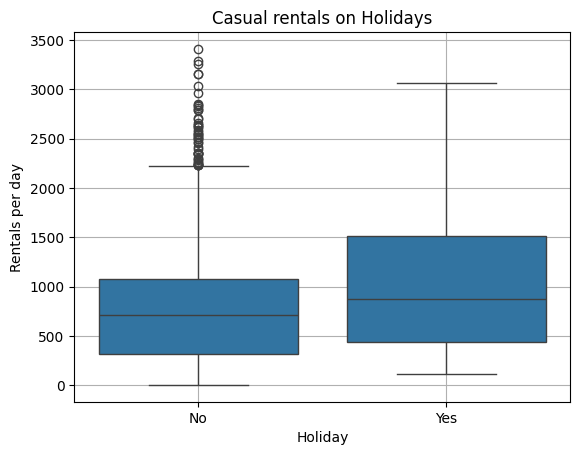

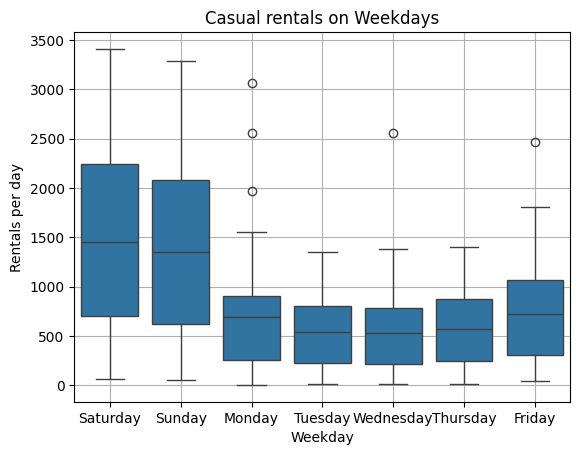

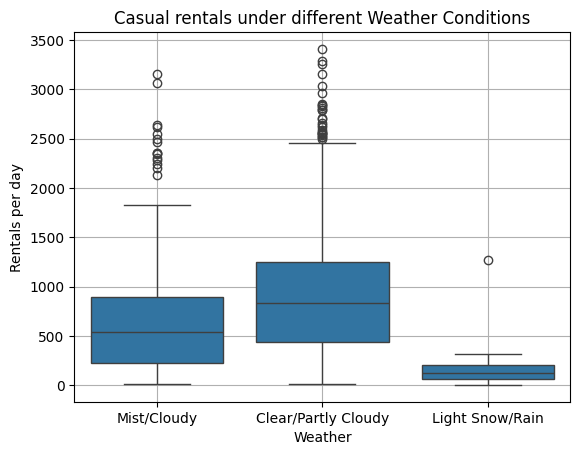

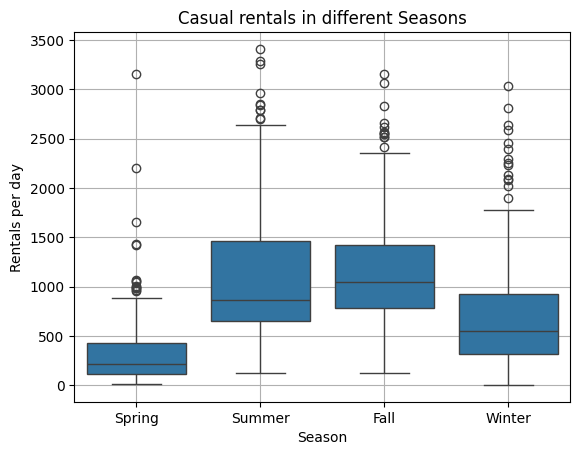

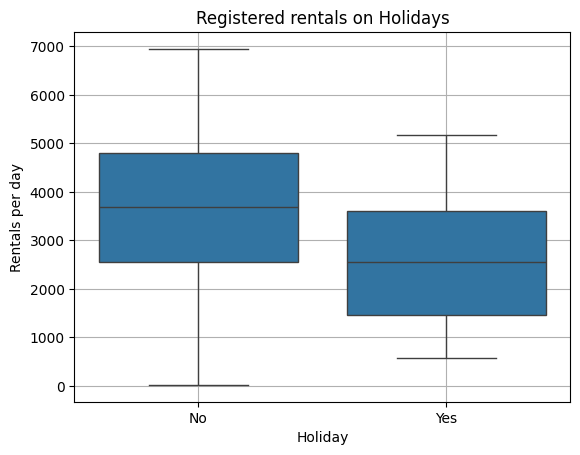

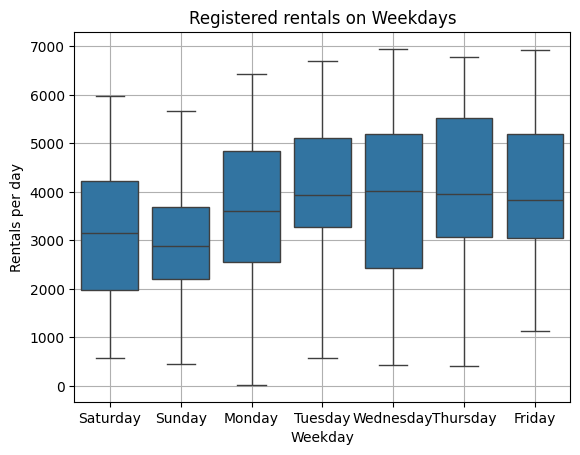

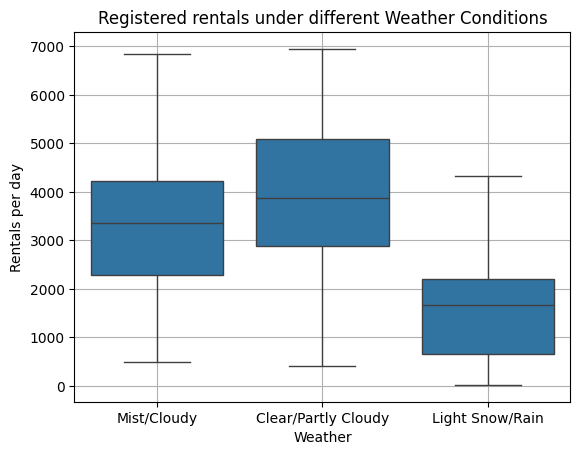

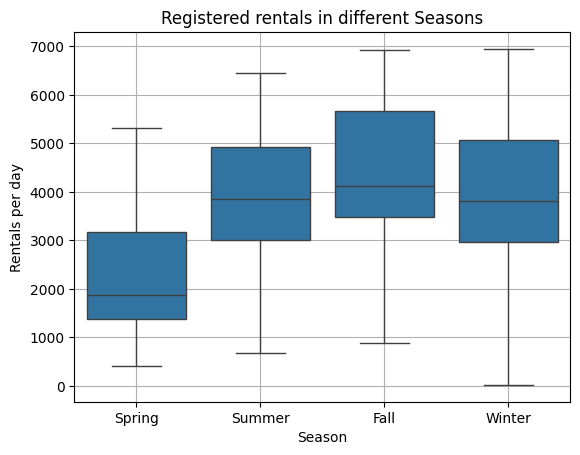

In [3]:
# For Casual users

sns.boxplot(data=df, y="Casual",x = "Holiday" )
plt.ylabel("Rentals per day")
plt.title("Casual rentals on Holidays")
plt.grid()
plt.show()

sns.boxplot(data=df, y="Casual",x = "Weekday" )
plt.ylabel("Rentals per day")
plt.title("Casual rentals on Weekdays")
plt.grid()
plt.show()

sns.boxplot(data=df, y="Casual",x = "Weather" )
plt.ylabel("Rentals per day")
plt.title("Casual rentals under different Weather Conditions")
plt.grid()
plt.show()

sns.boxplot(data=df, y="Casual",x = "Season" )
plt.ylabel("Rentals per day")
plt.title("Casual rentals in different Seasons")
plt.grid()
plt.show()


# For Registered Users

sns.boxplot(data=df, y="Registered",x = "Holiday" )
plt.ylabel("Rentals per day")
plt.title("Registered rentals on Holidays")
plt.grid()
plt.show()

sns.boxplot(data=df, y="Registered",x = "Weekday" )
plt.ylabel("Rentals per day")
plt.title("Registered rentals on Weekdays")
plt.grid()
plt.show()

sns.boxplot(data=df, y="Registered",x = "Weather" )
plt.ylabel("Rentals per day")
plt.title("Registered rentals under different Weather Conditions")
plt.grid()
plt.show()

sns.boxplot(data=df, y="Registered",x = "Season" )
plt.ylabel("Rentals per day")
plt.title("Registered rentals in different Seasons")
plt.grid()
plt.show()


